In [1]:
# import stuff again

from mpl_toolkits.mplot3d import Axes3D
import numpy
from matplotlib import pyplot, cm

# magics

%matplotlib inline

In [2]:
# declare variables

nx = 31
ny = 31

nu = 0.5 # viscosity

dx = 2 / (nx - 1)
dy = 2 / (ny - 1)

sigma = 0.25
dt = sigma * dx * dy / nu

u = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

X, Y = numpy.meshgrid(x, y)

In [3]:
# define a timestepping function

def diffuse(nt):
    
    u = numpy.ones((ny, nx))
    un = numpy.ones((ny, nx))
    
    # initial conditions
    u[int(0.5 / dx):int(1 / dx + 1), int(0.5 / dx):int(1 / dx + 1)] = 2
    
    for n in range(nt + 1):
        
        un = u.copy()
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1] + nu * dt / dx ** 2 * (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) 
                                        + nu * dt / dy ** 2 * (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]))
        
        u[0, :] = 1
        u[-1, :] = 1
        u[:, 0] = 1
        u[:, -1] = 1
        
    figure = pyplot.figure()
    axes = figure.gca(projection = "3d")
    surface = axes.plot_surface(X, Y, u[:], cmap = cm.viridis)

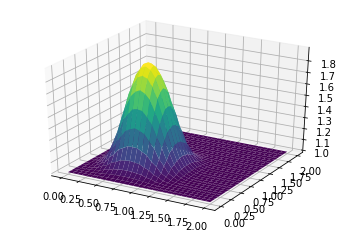

In [4]:
diffuse(10)

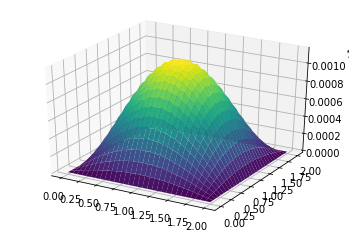

In [5]:
diffuse(1000)